## Calculating technical indicators
## Teknik göstergeleri hesaplama

In [108]:
import yfinance as yf 
import ta 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [109]:
df = yf.download("BTC-USD", start="2022-07-01", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [110]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-01 00:00:00+00:00,19878.185547,20632.671875,19705.644531,20320.039062,20320.039062,0
2022-07-01 01:00:00+00:00,20308.171875,20401.996094,20282.875000,20385.322266,20385.322266,762939392
2022-07-01 02:00:00+00:00,20398.035156,20454.083984,20289.501953,20307.867188,20307.867188,530212864
2022-07-01 03:00:00+00:00,20301.914062,20301.914062,19782.597656,19782.597656,19782.597656,690944000
2022-07-01 04:00:00+00:00,19752.228516,19752.228516,19468.343750,19469.933594,19469.933594,1126240256
...,...,...,...,...,...,...
2023-08-18 05:00:00+00:00,26262.656250,26514.214844,26262.656250,26439.041016,26439.041016,890626048
2023-08-18 06:00:00+00:00,26439.648438,26598.652344,26439.648438,26506.587891,26506.587891,964212736
2023-08-18 07:00:00+00:00,26510.484375,26520.677734,26418.230469,26418.230469,26418.230469,900331520


In [111]:
df["%K"]=ta.momentum.stoch(df.High,df.Low,df.Close,window=14,smooth_window=3)

In [112]:
df["%D"]=df["%K"].rolling(3).mean()

In [113]:
df["rsi"]=ta.momentum.rsi(df.Close,window=14)

In [114]:
df["macd"]=ta.trend.macd_diff(df.Close)

In [115]:
df.dropna(inplace=True)

## Explanation of how trigger signals are attained
## Tetikleme sinyallerinin nasıl elde edildiğinin açıklaması

In [117]:
# dfx=pd.DataFrame()
# for i in range(1,4):
#     mask=(df["%K"].shift(i)<20) & (df["%D"].shift(i)<20)
#     dfx=dfx.append(mask,ignore_index=True)

In [118]:
# dfx.sum(axis=0)

## Get the triggers for Buys and Sell
## Alış ve Satış için tetikleyicileri edinin

In [119]:
def gettriggers(df, lags, buy=True):
    dfx = pd.DataFrame()
    for i in range(1, lags+1):
        if buy:
            mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
        else:
            mask = (df['%K'].shift(i) > 80) & (df['%D'].shift(i) > 80)
        dfx = dfx.append(mask, ignore_index=True)
    return dfx.sum(axis=0)

In [120]:
df["Buytrigger"]=np.where(gettriggers(df,4),1,0)

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=Tr

In [121]:
df["Selltrigger"]=np.where(gettriggers(df,4,False),1,0)

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=True)
C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_17392\3342241015.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfx = dfx.append(mask, ignore_index=Tr

## Buying/Selling condition (Trigger, Stochastic, RSI, MACD)
## Alış/Satış koşulu (Tetikleyici, Stokastik, RSI, MACD)

In [122]:
df["Buy"] = np.where(
    (df.Buytrigger) & 
    (df["%K"].between(20, 80)) & 
    (df["%D"].between(20, 80)) & 
    (df["rsi"] > 50) & 
    (df["macd"] > 0), 
    1, 
    0
)


In [123]:
df["Sell"] = np.where(
    (df.Selltrigger) & 
    (df["%K"].between(20, 80)) & 
    (df["%D"].between(20, 80)) & 
    (df["rsi"] < 50) & 
    (df["macd"] < 0), 
    1, 
    0
)


## Buying and Selling Dates
## Alış ve Satış Tarihleri

In [124]:
Buying_dates,Selling_dates=[],[]

In [125]:
for i in range(len(df)-1):
    if df.Buy.iloc[i]:
        Buying_dates.append(df.iloc[i+1].name)
        for num,j in enumerate(df.Sell[i:]):
            if j:
                Selling_dates.append(df.iloc[i+num+1].name)
                break

## Avoid meaningless or multiple positions
## Anlamsız veya çoklu konumlardan kaçının

In [126]:
cutit=len(Buying_dates)-len(Selling_dates)

In [127]:
if cutit:
    Buying_dates=Buying_dates[:-cutit]

In [128]:
frame=pd.DataFrame({"Buying_dates":Buying_dates,"Selling_dates":Selling_dates})

In [129]:
frame

,Buying_dates,Selling_dates
0,2022-07-04 10:00:00+00:00,2022-07-05 09:00:00+00:00
1,2022-07-14 17:00:00+00:00,2022-07-30 21:00:00+00:00
2,2022-08-02 00:00:00+00:00,2022-08-25 00:00:00+00:00
3,2022-08-02 15:00:00+00:00,2022-08-25 00:00:00+00:00
4,2022-08-03 07:00:00+00:00,2022-08-25 00:00:00+00:00
5,2022-08-03 08:00:00+00:00,2022-08-25 00:00:00+00:00
6,2022-08-05 02:00:00+00:00,2022-08-25 00:00:00+00:00
7,2022-08-05 23:00:00+00:00,2022-08-25 00:00:00+00:00
8,2022-09-05 16:00:00+00:00,2022-09-25 16:00:00+00:00
9,2022-09-05 17:00:00+00:00,2022-09-25 16:00:00+00:00


In [130]:
actuals=frame[frame.Buying_dates > frame.Selling_dates.shift(1)]

In [131]:
actuals

,Buying_dates,Selling_dates
1,2022-07-14 17:00:00+00:00,2022-07-30 21:00:00+00:00
2,2022-08-02 00:00:00+00:00,2022-08-25 00:00:00+00:00
8,2022-09-05 16:00:00+00:00,2022-09-25 16:00:00+00:00
14,2022-10-02 20:00:00+00:00,2022-10-05 21:00:00+00:00
15,2022-11-02 17:00:00+00:00,2022-11-28 01:00:00+00:00
21,2022-12-18 20:00:00+00:00,2022-12-24 14:00:00+00:00
26,2022-12-30 19:00:00+00:00,2023-01-03 15:00:00+00:00
27,2023-01-08 21:00:00+00:00,2023-01-24 10:00:00+00:00
31,2023-02-05 07:00:00+00:00,2023-02-21 10:00:00+00:00
32,2023-03-01 04:00:00+00:00,2023-04-26 21:00:00+00:00


## Profit Calculation
## Kar Hesaplama

In [132]:
def profitcalc():
    Buyprices=df.loc[actuals.Buying_dates].Open
    Sellprices=df.loc[actuals.Selling_dates].Open
    return (Sellprices.values-Buyprices.values)/Buyprices.values

In [133]:
profits=profitcalc()

In [134]:
profits

array([ 0.18547557, -0.08045448, -0.04339493,  0.03996194, -0.19685469,
        0.00401567,  0.00750303,  0.34737439,  0.05957627,  0.21031171,
       -0.00148047,  0.01670718, -0.03115224, -0.00044565])

In [135]:
profits.mean()

0.03693880798211533

In [136]:
(profits + 1).prod()

1.4966805128593064

## Visualizing the Signals
## Sinyalleri Görselleştirme

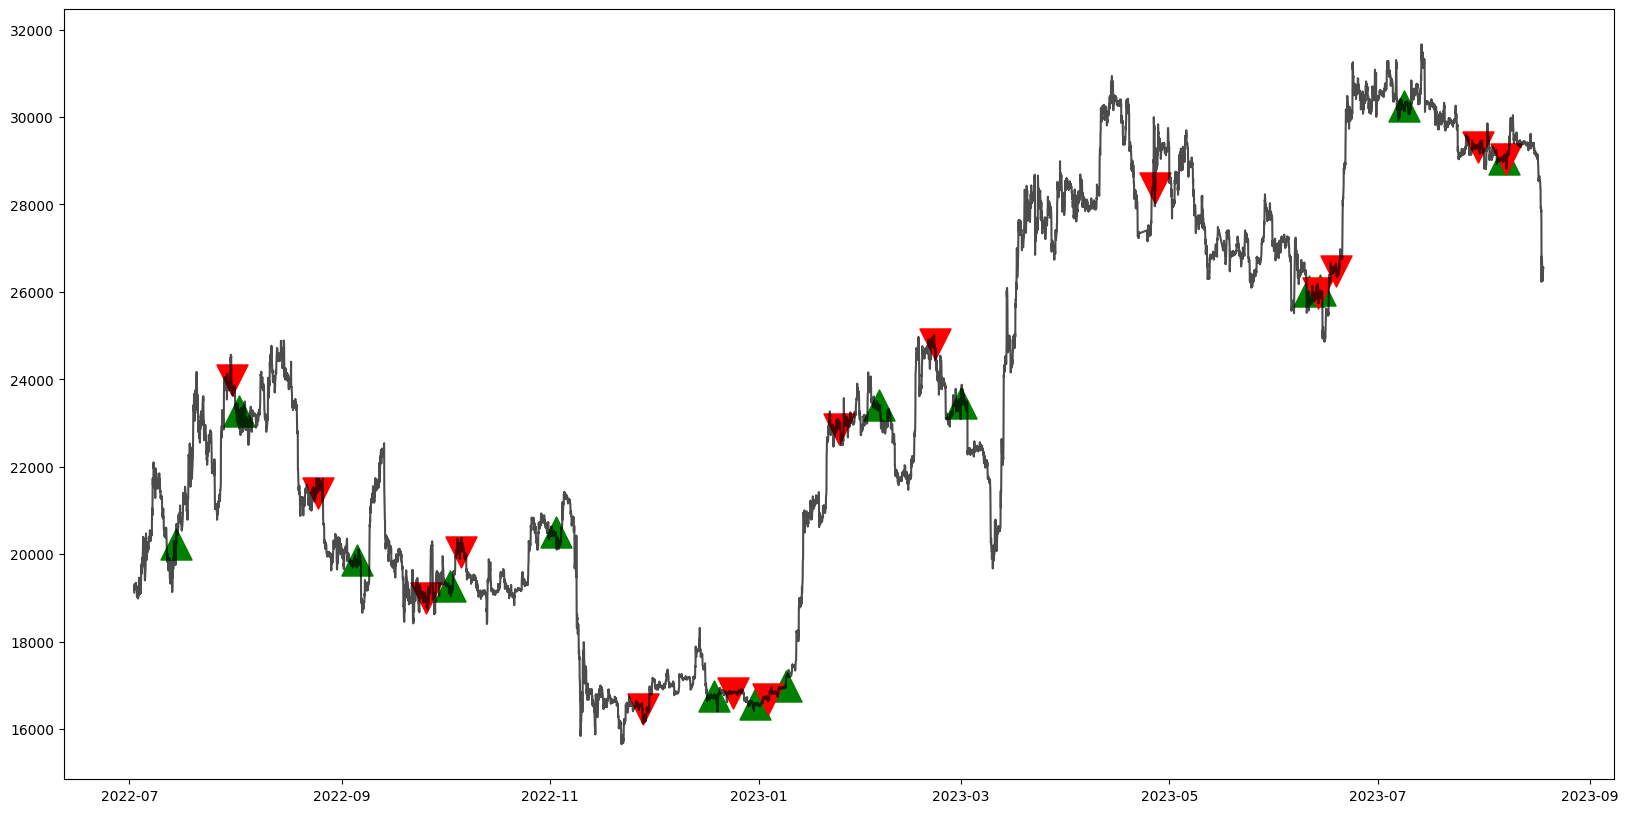

In [137]:
plt.figure(figsize=(20,10))
plt.plot(df.Close,color="k",alpha=0.7)
plt.scatter(actuals.Buying_dates,df.Open[actuals.Buying_dates],marker="^",color="g",s=500)
plt.scatter(actuals.Selling_dates,df.Open[actuals.Selling_dates],marker="v",color="r",s=500)